
<br>
    The objective of this exercice is to analyse the control of the autonomic<br>
    nervous system at rest and after alcool consumption using breathing, mean<br>
    blood pressure and interbeat signals.<br>


In [1]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp
import m03_ex2_ext as my_plot

Load signals of a subject at rest.

In [2]:
x = np.genfromtxt('heart_1.dat', delimiter='  ').T
x = {'rr':x[0], 'bp':x[1], 'resp':x[2]}
# Load signals of a subject after alcool consumption.
y = np.genfromtxt('heart_2.dat', delimiter='  ').T
y = {'rr':y[0], 'bp':y[1], 'resp':y[2]}
# Signals are sampled at 4 Hz.
fs = 4
# Generate the time for the recordings.
t = np.arange(len(x['rr']))/fs

<br>
Cardiac interbeats, mean blood pressure and respiration volume of a subject at rest.<br>

Q: Comment the different signals and their relationships.<br>
**Answer:**
- The cardiac interbeat interval (RR), mean blood pressure (BP), and respiration (RESP) signals show distinct physiological patterns at rest.
- RR intervals reflect heart rate variability, BP shows slow oscillations, and RESP displays regular breathing cycles.

Q: Which signals are related and how?<br>
**Answer:**
- Respiration and RR intervals are related through respiratory sinus arrhythmia: heart rate increases during inspiration and decreases during expiration.
- BP and RR intervals are also related via baroreflex mechanisms: changes in BP can trigger compensatory changes in heart rate.

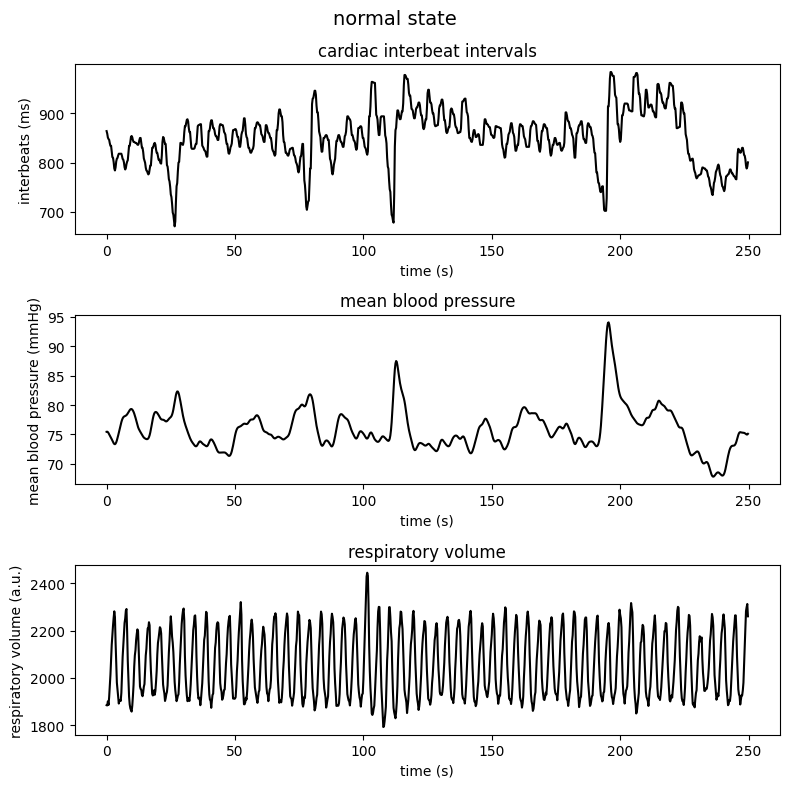

In [3]:
my_plot.plot_time(x, t, 'normal state')

<br>
Cardiac interbeats, mean blood pressure and respiration volume of a subject after alcool consumption.<br>

Q: Comment the different signals and their relationships.<br>
**Answer:**
- After alcohol consumption, the RR, BP, and RESP signals may show altered patterns compared to rest. RR intervals can become more irregular, BP may show increased variability, and RESP cycles may be less regular.

Q: Which signals are related and how?<br>
**Answer:**
- The relationships between RR, BP, and RESP persist, but may be weakened or altered due to the effects of alcohol on autonomic control.

Q: What are the differences with rest recording of previous figure?<br>
**Answer:**
- Compared to rest, alcohol consumption typically reduces heart rate variability, disrupts regular respiratory sinus arrhythmia, and may increase BP fluctuations. The coupling between signals is less pronounced, indicating impaired autonomic regulation.

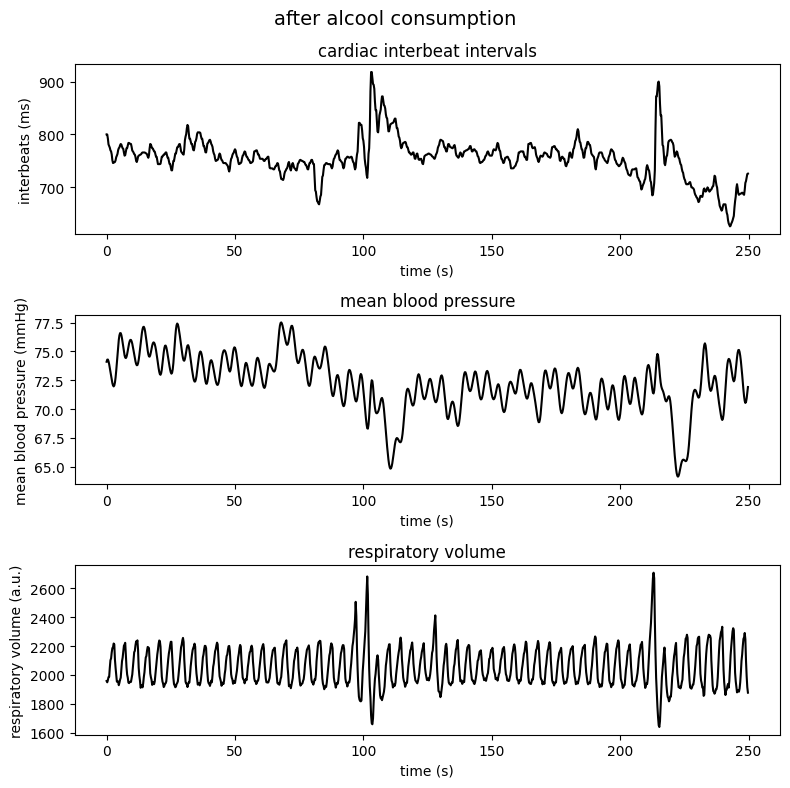

In [4]:
my_plot.plot_time(y, t, 'after alcool consumption')

<br>
Compute the intercorrelation of the signals of the subject at rest.<br>

Q: Comment the oscillation present in the different signals.<br>
**Answer:**
- The autocorrelation functions show periodic oscillations, reflecting the regularity of the underlying physiological signals (e.g., breathing cycles, heart rate variability).

Q: Which signals are related and how.<br>
**Answer:**
- Peaks in the cross-correlation between RR and RESP indicate respiratory sinus arrhythmia. Correlation between BP and RR reflects baroreflex activity. Strong periodicity and correlation at rest indicate healthy autonomic control.

In [5]:
def my_corr(x):
    rxx = np.correlate(x-np.mean(x), x-np.mean(x), mode='full')/len(x)
    return rxx

In [6]:
x['rxx_rr'] = my_corr(x['rr'])
x['rxx_bp'] = my_corr(x['bp'])
x['rxx_resp'] = my_corr(x['resp'])

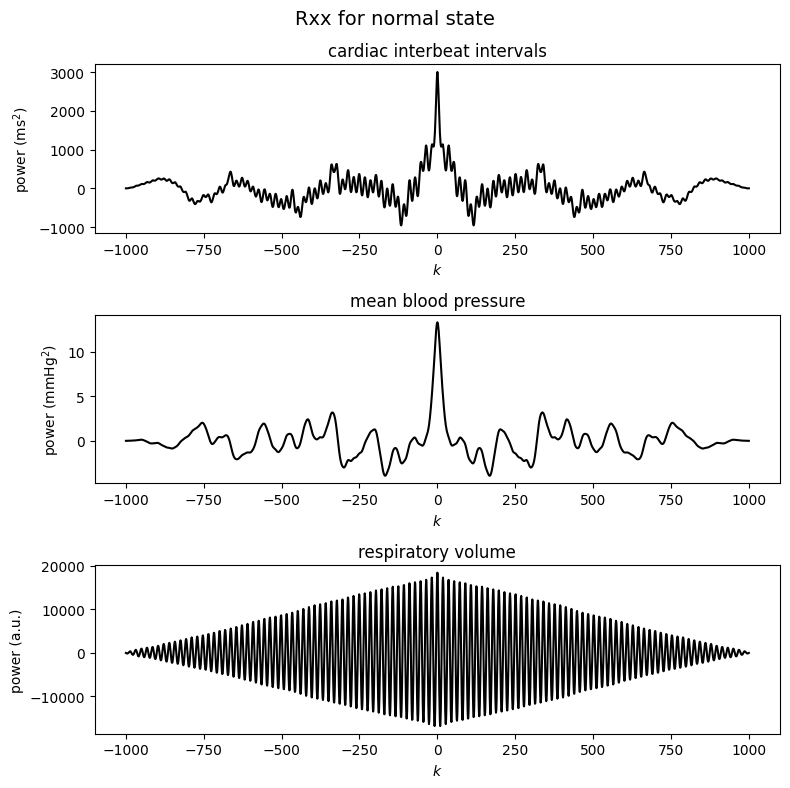

In [7]:
my_plot.plot_rxx(x, 'Rxx for normal state')

<br>
Compute the intercorrelation of the signals of the subject after alcool consumption.<br>

Q: Comment the oscillation present in the different signals.<br>
**Answer:**
- After alcohol consumption, the oscillations in the autocorrelation functions are less regular and may show reduced amplitude, indicating decreased periodicity and increased signal variability.

Q: Which signals are related and how.<br>
**Answer:**
- The relationships between RR, BP, and RESP are weaker, with less pronounced cross-correlation peaks. This suggests impaired coupling between heart rate, blood pressure, and respiration.

Q: What difference do you observe with the previous figure?<br>
**Answer:**
- Compared to rest, the signals after alcohol consumption show reduced regularity and weaker interrelationships, reflecting impaired autonomic nervous system control.

In [8]:
y['rxx_rr'] = my_corr(y['rr'])
y['rxx_bp'] = my_corr(y['bp'])
y['rxx_resp'] = my_corr(y['resp'])

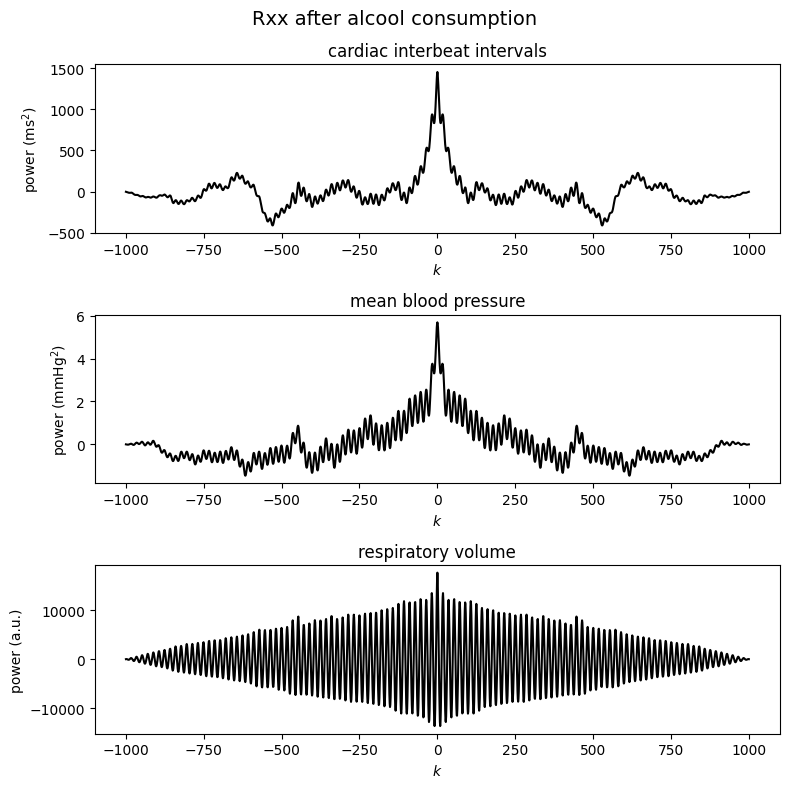

In [9]:
my_plot.plot_rxx(y, 'Rxx after alcool consumption')

<br>
Compute the PSD of the signal for the subject at rest.<br>

Q: How the different peaks are related to the control of the autonomic nervous system?<br>
**Answer:**
- Peaks in the PSD correspond to physiological rhythms: low-frequency peaks reflect sympathetic activity, high-frequency peaks are associated with parasympathetic (vagal) activity and respiratory modulation.

Q: Do the positions and amplitude of the peaks confirm your previous findings?<br>
**Answer:**
- Yes, the presence of distinct peaks at expected frequencies confirms healthy autonomic regulation and the relationships observed in the time and correlation analyses.

In [10]:
def my_psd(x, half_win=250):
    interval = np.arange(-half_win,half_win+1)+len(x)//2
    x_sub = x[interval]
    psd = np.abs(np.fft.fft(sp.windows.hann(len(interval))*x_sub, 2048))
    return psd

In [11]:
x['RR'] = my_psd(x['rxx_rr'])
x['BP'] = my_psd(x['rxx_bp'])
x['RESP'] = my_psd(x['rxx_resp'])

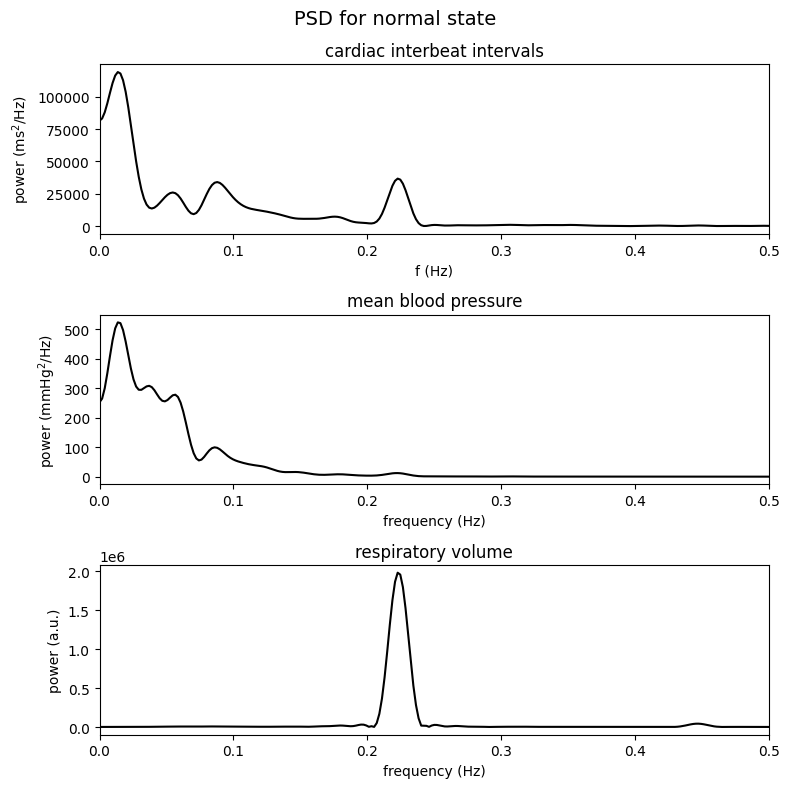

In [12]:
my_plot.plot_X(x, fs, 'PSD for normal state')

<br>
Compute the PSD of the signal for the subject after alcool consumption.<br>

Q: How the different peaks are related to the control of the autonomic nervous system?<br>
**Answer:**
- After alcohol consumption, the PSD may show reduced amplitude of high-frequency peaks, indicating diminished parasympathetic activity. Low-frequency peaks may be more variable, reflecting altered sympathetic control.

Q: Do the positions and amplitude of the peaks confirm your previous findings?<br>
**Answer:**
- Yes, the changes in peak positions and amplitudes confirm impaired autonomic regulation and reduced coupling between physiological signals, as seen in previous analyses.

In [13]:
y['RR'] = my_psd(y['rxx_rr'])
y['BP'] = my_psd(y['rxx_bp'])
y['RESP'] = my_psd(y['rxx_resp'])

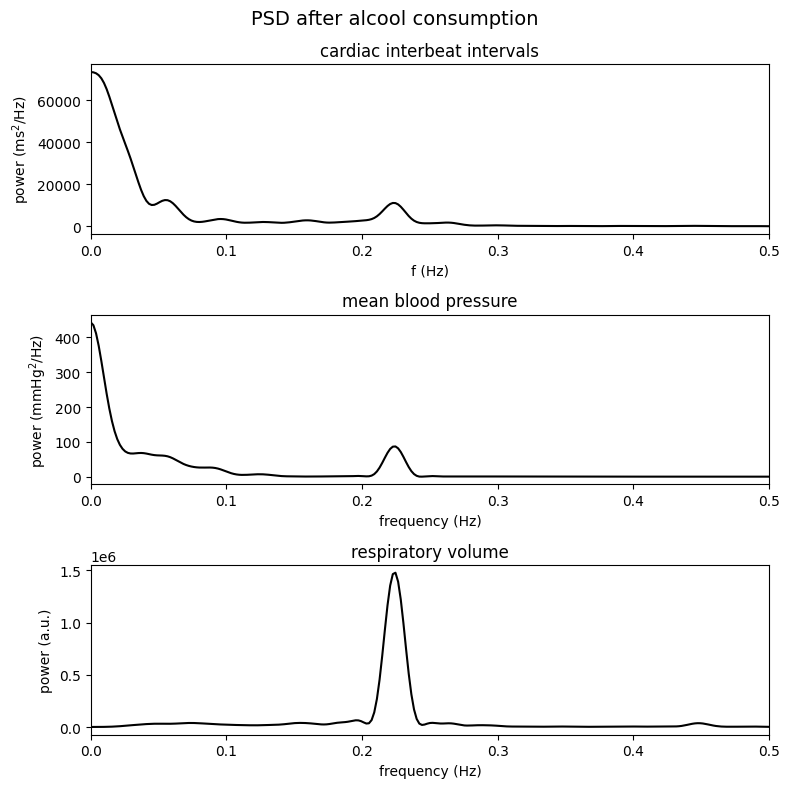

In [14]:
my_plot.plot_X(y, fs, 'PSD after alcool consumption')

<br>
Plot the PSDs of the signals for the two conditions.<br>

Q: Discuss the differences.<br>
**Answer:**
- Comparing the PSDs for rest and after alcohol consumption, the rest condition shows more pronounced and regular peaks, indicating healthy autonomic control.
- After alcohol consumption, the PSDs are flatter and peaks are less distinct, reflecting reduced variability and impaired autonomic function.
- These differences highlight the impact of alcohol on the autonomic nervous system, reducing its ability to regulate heart rate, blood pressure, and respiration effectively.

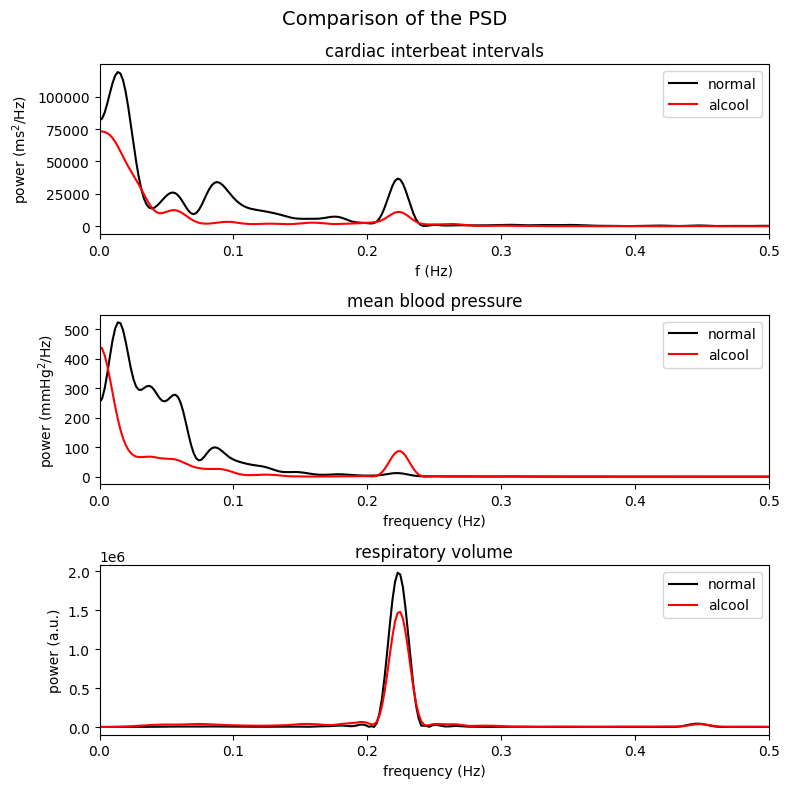

In [15]:
my_plot.plot_XY(x, y, fs, 'Comparison of the PSD')